This notebook shows examples for usin alphalens (https://github.com/quantopian/alphalens). Most of codes in this notebook comes from https://www.quantopian.com/lectures/factor-analysis

In [7]:
import numpy as np
import pandas as pd
import alphalens
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.classifiers.fundamentals import Sector  
from quantopian.pipeline.filters import QTradableStocksUS

we will use cross sectional momentum as example factor

In [8]:
class CrossSectionalMomentum(CustomFactor):    
    inputs = [USEquityPricing.close]
    window_length = 252
    def compute(self, today, assets, out, prices):
        prices = pd.DataFrame(prices)
        R = (prices / prices.shift(100))
        out[:] = (R.T - R.T.mean()).T.mean()

In [9]:
def make_pipeline():
    cross_momentum = CrossSectionalMomentum()
    initial_screen=QTradableStocksUS()
    pipe_screen = (initial_screen&cross_momentum.notnan())
    pipe_columns = {
        'cross_momentum':cross_momentum,
        'sector':Sector()
    }
    pipe = Pipeline(columns = pipe_columns, screen = pipe_screen)
    return pipe


Sector codes used Morningstar

In [5]:
sector_codes = {
     -1: 'Misc',
    101: 'Basic Materials',
    102: 'Consumer Cyclical',
    103: 'Financial Services',
    104: 'Real Estate',
    205: 'Consumer Defensive',
    206: 'Healthcare',
    207: 'Utilities',
    308: 'Communication Services',
    309: 'Energy',
    310: 'Industrials',
    311: 'Technology' ,    
}

run pipeline

In [6]:
start_date='2017-1-1'
end_date='2017-12-31'

In [12]:
results=run_pipeline(make_pipeline(),start_date,end_date)
results

cross_momentum  sector
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             -0.112231     101
                          Equity(24 [AAPL])            -0.006619     311
                          Equity(31 [ABAX])             0.007472     206
                          Equity(41 [ARCB])             0.051487     310
                          Equity(52 [ABM])              0.092272     310
                          Equity(53 [ABMD])             0.115415     206
                          Equity(62 [ABT])             -0.071435     206
                          Equity(64 [ABX])              0.177193     101
                          Equity(67 [ADSK])             0.099269     311
                          Equity(76 [TAP])             -0.015589     205
                          Equity(84 [ACET])            -0.149657     206
                          Equity(110 [ACXM])            0.068931     311
                          Equity(114 [ADBE])            0.008706     311
                          Equity(122 [ADI])             0.046009     311
                          Equity(128 [ADM])             0.057704     205
                          Equity(154 [AEM])             0.162987     101
                          Equity(161 [AEP])            -0.076954     207
                          Equity(166 [AES])             0.027665     207
                          Equity(168 [AET])            -0.033244     206
                          Equity(185 [AFL])             0.009331     103
                          Equity(197 [AGCO])           -0.055866     310
                          Equity(216 [HES])            -0.000683     309
                          Equity(239 [AIG])            -0.005028     103
                          Equity(247 [AIN])             0.028089     102
                          Equity(253 [AIR])             0.165079     310
                          Equity(266 [AJG])             0.041668     103
                          Equity(270 [AKRX])           -0.103828     206
                          Equity(289 [MATX])           -0.065412     310
                          Equity(300 [ALK])            -0.066506     310
                          Equity(301 [ALKS])            0.129281     206
...                                                          ...     ...
2018-01-02 00:00:00+00:00 Equity(50430 [LW])            0.102453     205
                          Equity(50444 [LEXE_A])        0.018899     311
                          Equity(50499 [EVHC])         -0.306188     206
                          Equity(50509 [ICHR])          0.245933     311
                          Equity(50518 [ATH])          -0.038802     103
                          Equity(50526 [LGF_A])         0.051765     102
                          Equity(50533 [CNDT])         -0.042162     310
                          Equity(50534 [HGV])           0.132208     102
                          Equity(50535 [PK])            0.010113     104
                          Equity(50537 [WRD])           0.011255     309
                          Equity(50595 [BIVV])          0.008774     206
                          Equity(50606 [VREX])         -0.014783     206
                          Equity(50612 [FRAC])         -0.103577     309
                          Equity(50616 [ANAB])          0.934556     206
                          Equity(50633 [JAG])          -0.005088     309
                          Equity(50634 [JELD])          0.031331     101
                          Equity(50636 [REVG])         -0.068666     102
                          Equity(50639 [LAUR])         -0.076481     205
                          Equity(50642 [INVH])          0.003375     104
                          Equity(50683 [SNAP])         -0.291200     311
                          Equity(50690 [CJ])           -0.176223     309
                          Equity(50713 [GOOS])          0.154674     102
                          Equity(50716 [DXC])           0.122379     311
                          Equity(50

get pricing data

In [13]:
asset_list = results.index.levels[1].unique()

In [14]:
prices = get_pricing(asset_list, start_date, end_date, fields='price')

create another pandas dataframe that add the quantiles, forward returns (in 1d, 5d and 10d) and group labels

In [17]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor=results['cross_momentum'],
                                                            prices=prices,
                                                            groupby=results['sector'],
                                                            groupby_labels=sector_codes,
                                                            periods=(1,5,10))
factor_data

1         5  \
date                      asset                                        
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])        0.026044  0.079186   
                          Equity(24 [AAPL])      -0.001032  0.025573   
                          Equity(31 [ABAX])      -0.003173 -0.092971   
                          Equity(41 [ARCB])       0.008671  0.015587   
                          Equity(52 [ABM])        0.015448 -0.030623   
                          Equity(53 [ABMD])       0.029990 -0.001157   
                          Equity(62 [ABT])        0.006921  0.057648   
                          Equity(64 [ABX])       -0.000307  0.024074   
                          Equity(67 [ADSK])       0.017592  0.050020   
                          Equity(76 [TAP])        0.015736 -0.014820   
                          Equity(84 [ACET])       0.019197 -0.019664   
                          Equity(110 [ACXM])      0.015117  0.015873   
                          Equity(114 [ADBE])      0.006281  0.046289   
                          Equity(122 [ADI])      -0.001931 -0.001931   
                          Equity(128 [ADM])      -0.001942 -0.037241   
                          Equity(154 [AEM])       0.004874  0.029947   
                          Equity(161 [AEP])       0.001435 -0.010194   
                          Equity(166 [AES])      -0.008596 -0.028295   
                          Equity(168 [AET])       0.009355  0.000725   
                          Equity(185 [AFL])       0.009032 -0.004868   
                          Equity(197 [AGCO])      0.039802  0.034993   
                          Equity(216 [HES])      -0.014489 -0.021343   
                          Equity(239 [AIG])       0.012917  0.031649   
                          Equity(247 [AIN])       0.022311 -0.030817   
                          Equity(253 [AIR])       0.006309 -0.030391   
                          Equity(266 [AJG])       0.012638  0.003459   
                          Equity(270 [AKRX])      0.060688  0.020833   
                          Equity(289 [MATX])      0.002471 -0.009429   
                          Equity(300 [ALK])       0.013289  0.045449   
                          Equity(301 [ALKS])      0.067201  0.042602   
...                                                    ...       ...   
2017-12-14 00:00:00+00:00 Equity(50417 [QTNA])   -0.011295  0.009991   
                          Equity(50418 [BL])     -0.001725  0.006325   
                          Equity(50424 [GOLF])    0.022545  0.048597   
                          Equity(50428 [AA])      0.006139  0.157025   
                          Equity(50430 [LW])      0.001444  0.000180   
                          Equity(50444 [LEXE_A])  0.006717  0.001343   
                          Equity(50499 [EVHC])    0.040655  0.047633   
                          Equity(50509 [ICHR])    0.056651  0.040705   
                          Equity(50518 [ATH])     0.009552  0.041393   
                          Equity(50526 [LGF_A])   0.015359  0.039089   
                          Equity(50533 [CNDT])    0.005711  0.015863   
                          Equity(50534 [HGV])     0.009413  0.007241   
                          Equity(50535 [PK])     -0.003488  0.013950   
                          Equity(50537 [WRD])     0.014970  0.080240   
                          Equity(50595 [BIVV])   -0.005606  0.007662   
                          Equity(50606 [VREX])    0.009289  0.075106   
                          Equity(50612 [FRAC])    0.007619  0.132698   
                          Equity(50616 [ANAB])    0.043498  0.058260   
                          Equity(50633 [JAG])     0.009811  0.094604   
                          Equity(50634 [JELD])    0.000518  0.016317   
                          Equity(50636 [REVG])    0.046065  0.131665   
                          Equity(50639 [LAUR])    0.002318  0.054869   
                          Equity(50642 [INVH])    0.013889 -0.014099   
                         

create return sheets

Returns Analysis


1       5       10
Ann. alpha                                     0.033   0.058   0.065
beta                                           0.158  -0.030  -0.139
Mean Period Wise Return Top Quantile (bps)     1.837   8.435  14.726
Mean Period Wise Return Bottom Quantile (bps) -2.669 -11.452 -20.010
Mean Period Wise Spread (bps)                  4.508   4.004   3.517

/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/pl

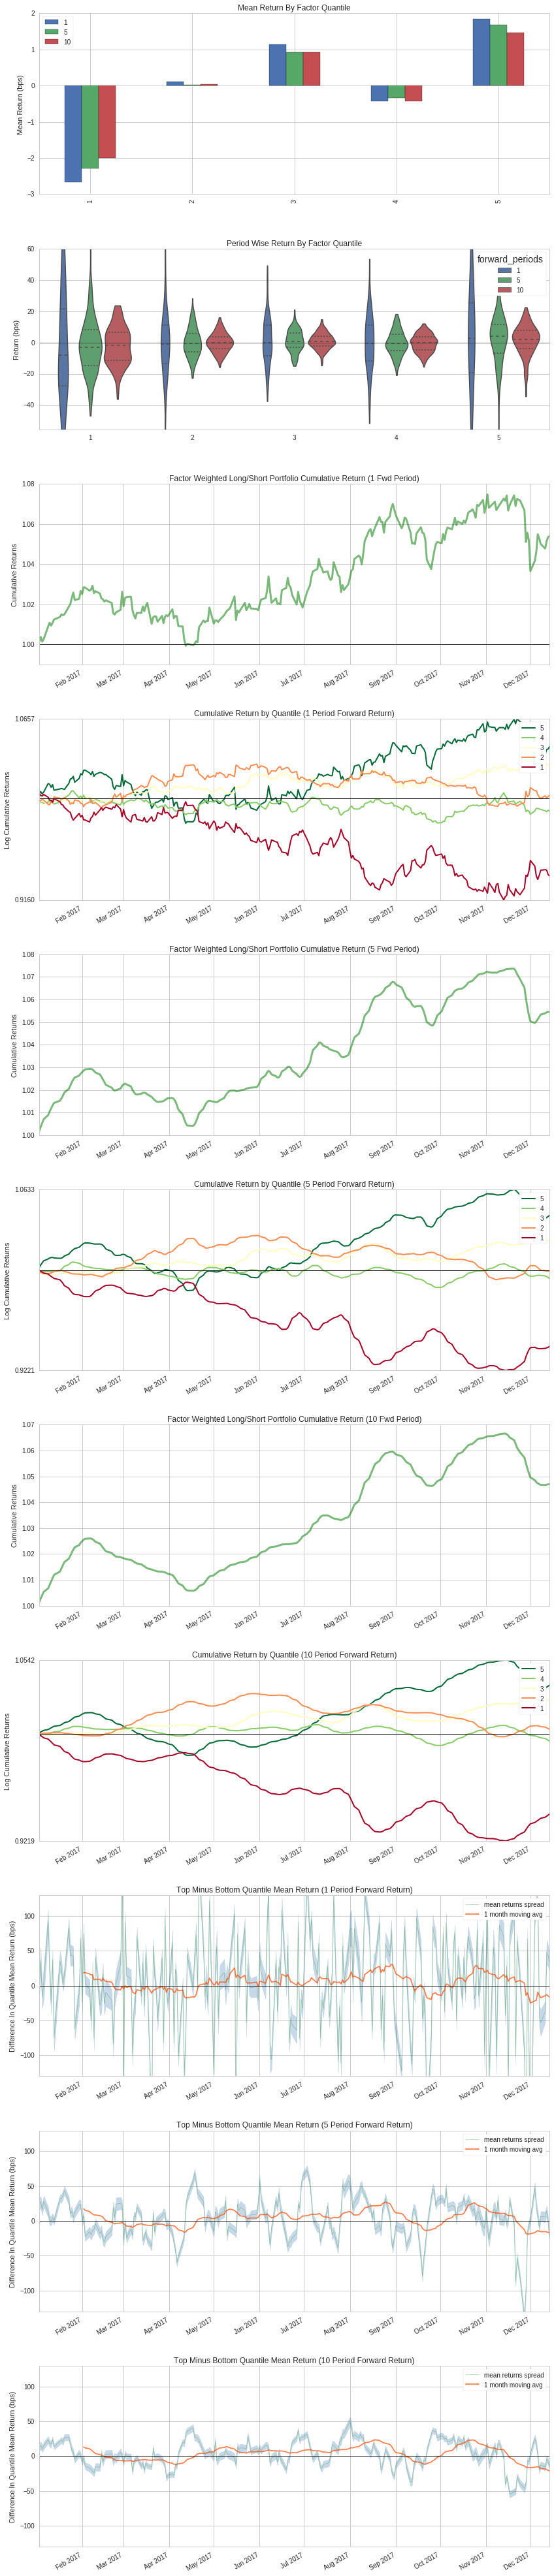

In [18]:
alphalens.tears.create_returns_tear_sheet(factor_data)

Create information coefficient sheets. The 'IC' here refers to the spearman correlation rank.

Information Analysis


1      5      10
IC Mean      0.009  0.013  0.011
IC Std.      0.145  0.133  0.124
t-stat(IC)   0.981  1.475  1.421
p-value(IC)  0.327  0.142  0.157
IC Skew     -0.341 -0.231 -0.104
IC Kurtosis  0.215  0.455 -0.133
Ann. IR      1.004  1.508  1.453

/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


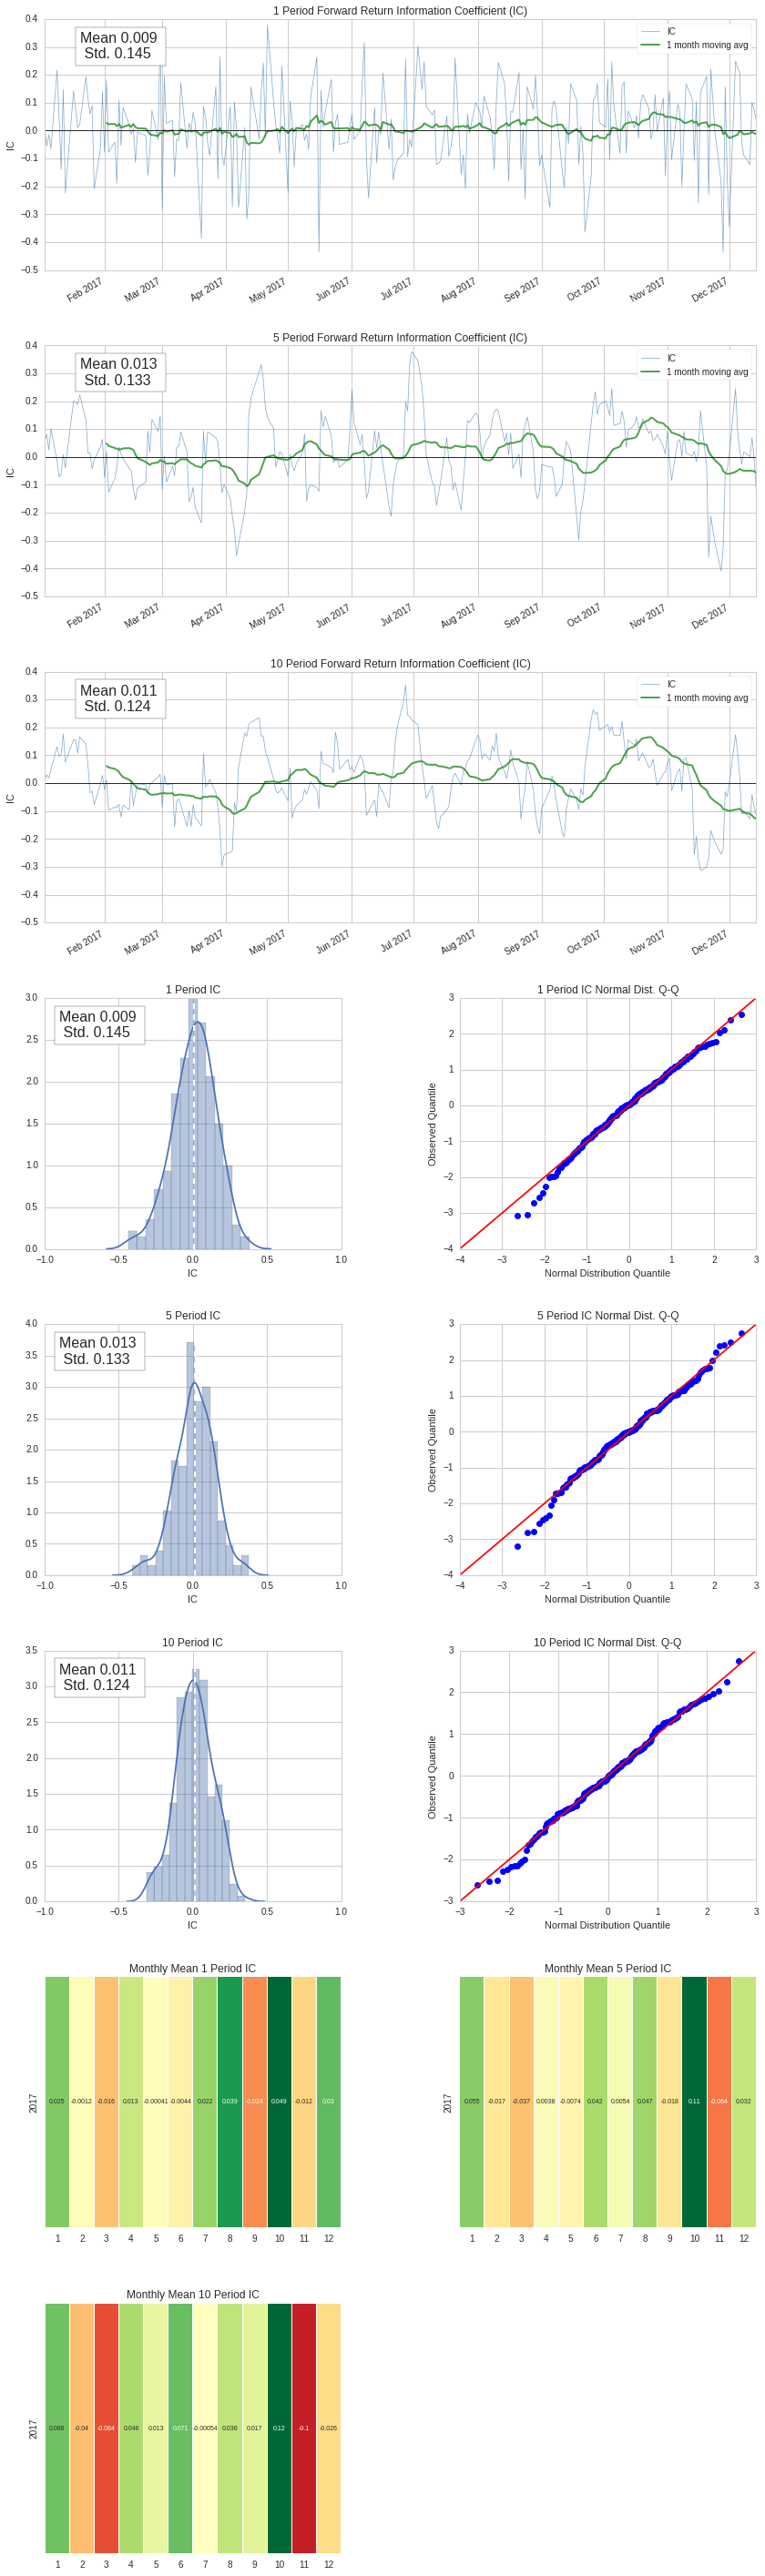

In [19]:
alphalens.tears.create_information_tear_sheet(factor_data)

create turn over sheet. The autocorrelation graph plots the factor's autocorrelation

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.008  0.040  0.078
Quantile 2 Mean Turnover   0.018  0.087  0.169
Quantile 3 Mean Turnover   0.021  0.102  0.198
Quantile 4 Mean Turnover   0.018  0.086  0.168
Quantile 5 Mean Turnover   0.008  0.039  0.076

1      5    10
Mean Factor Rank Autocorrelation  1.0  0.997  0.99

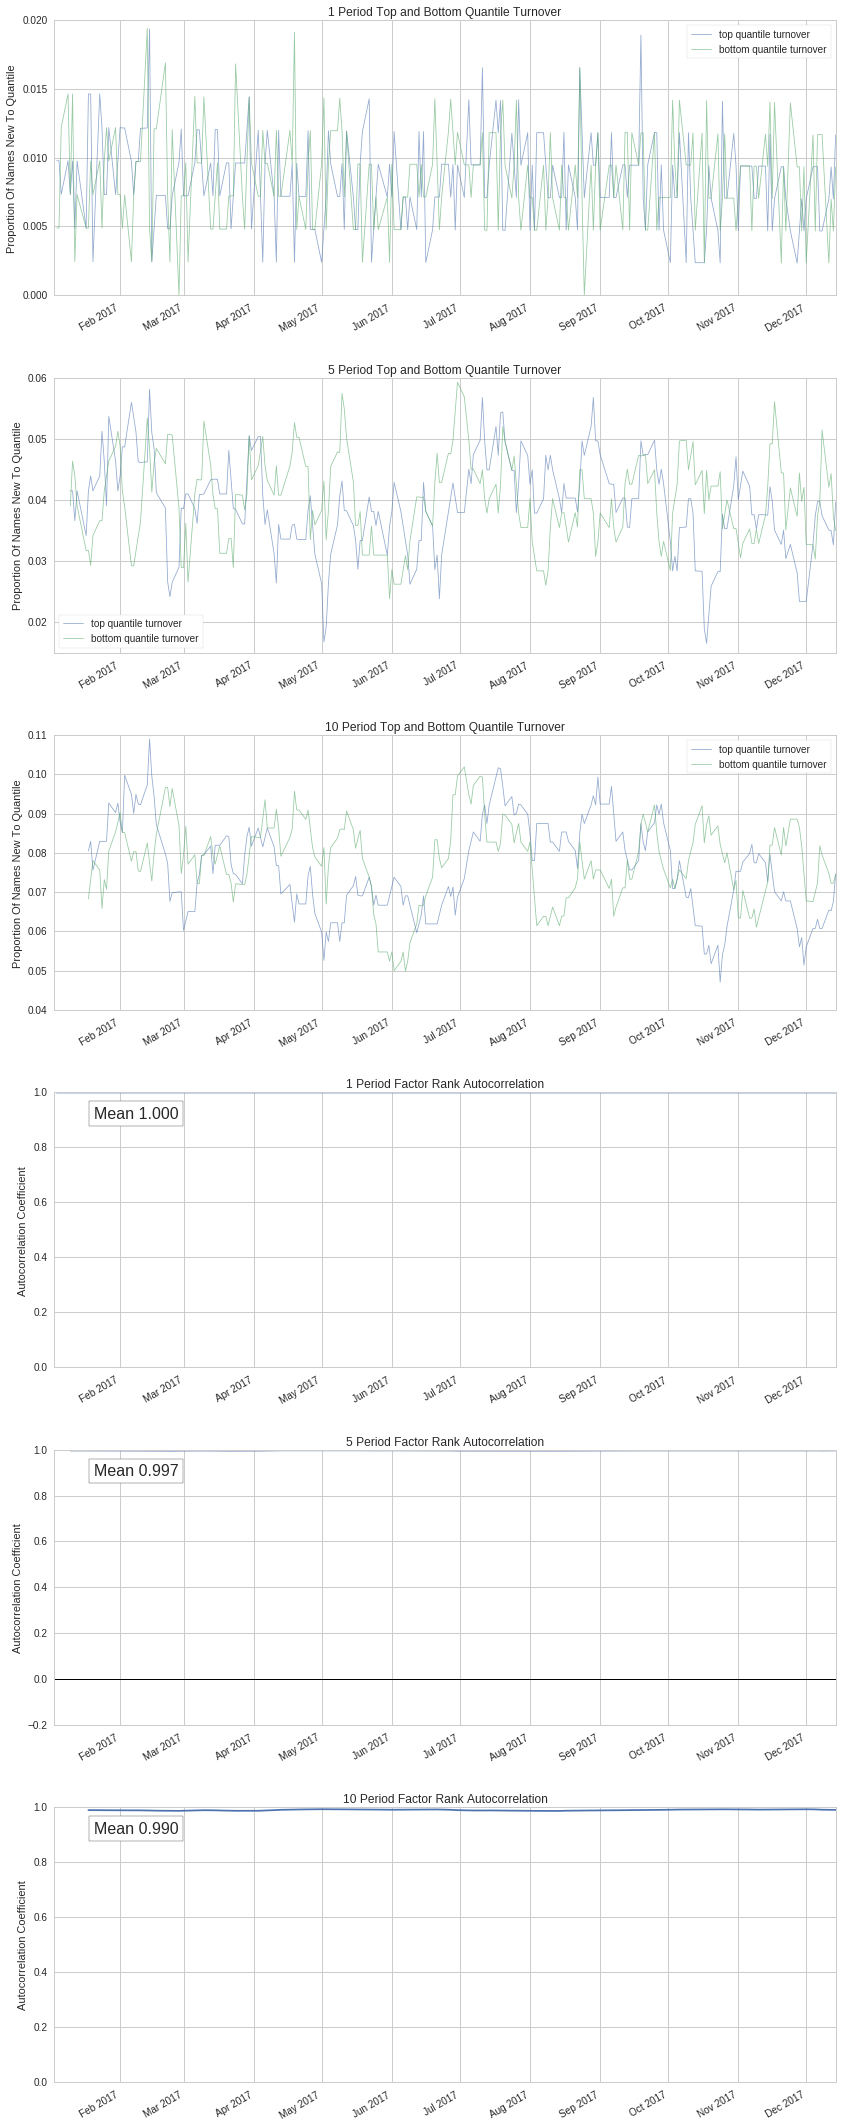

In [20]:
alphalens.tears.create_turnover_tear_sheet(factor_data)

some functions can be modified to return information by groups assigned in factor_data (in this case, the sector)

In [22]:
 alphalens.performance.mean_information_coefficient(factor_data, by_group=True)

1         5         10
group                                               
Basic Materials         0.001915  0.004185  0.009852
Communication Services  0.017016  0.042625  0.051052
Consumer Cyclical       0.014663  0.024886  0.031481
Consumer Defensive      0.015544  0.017997  0.013884
Energy                  0.010697  0.015426  0.014265
Financial Services     -0.006824 -0.030794 -0.042191
Healthcare              0.012802  0.027471  0.036061
Industrials            -0.001895  0.002198  0.003147
Misc                         NaN       NaN       NaN
Real Estate             0.018453  0.030719  0.041190
Technology              0.024088  0.036463  0.037553
Utilities              -0.002628 -0.023770 -0.029613

In [24]:
mean_return_quantile_sector, mean_return_quantile_sector_err =alphalens.performance.mean_return_by_quantile(factor_data,by_group=True)

In [25]:
mean_return_quantile_sector

1         5         10
factor_quantile group                                               
1               Basic Materials        -0.000512 -0.002276 -0.003957
                Communication Services -0.001413 -0.007073 -0.014195
                Consumer Cyclical      -0.000378 -0.001575 -0.002880
                Consumer Defensive     -0.000355 -0.001220 -0.002140
                Energy                 -0.001106 -0.004388 -0.006441
                Financial Services      0.000110  0.000356  0.000643
                Healthcare              0.000304  0.000870  0.001686
                Industrials            -0.000211 -0.000601 -0.001247
                Misc                   -0.000201 -0.000423 -0.000102
                Real Estate            -0.000436 -0.002431 -0.005265
                Technology              0.000168  0.000955  0.001508
                Utilities               0.000725  0.003567  0.006224
2               Basic Materials         0.000061 -0.000390 -0.000710
                Communication Services -0.000317 -0.001230 -0.002441
                Consumer Cyclical       0.000203  0.001198  0.002448
                Consumer Defensive     -0.000206 -0.000870 -0.001578
                Energy                 -0.001271 -0.006341 -0.011760
                Financial Services      0.000100  0.000534  0.000696
                Healthcare             -0.000007  0.000054  0.000702
                Industrials             0.000182  0.000971  0.001832
                Misc                    0.000024 -0.001308 -0.005043
                Real Estate            -0.000300 -0.001750 -0.003313
                Technology              0.000394  0.001683  0.002724
                Utilities               0.000560  0.002740  0.005366
3               Basic Materials         0.000211  0.001685  0.004029
                Communication Services -0.000550 -0.003135 -0.004964
                Consumer Cyclical       0.000219  0.001014  0.001886
                Consumer Defensive     -0.000095 -0.000269 -0.000265
                Energy                 -0.001338 -0.006715 -0.012378
                Financial Services      0.000076  0.000302  0.000598
                Healthcare              0.000681  0.002197  0.003336
                Industrials             0.000105  0.000731  0.001751
                Real Estate            -0.000069 -0.000857 -0.001550
                Technology              0.000356  0.001996  0.003481
                Utilities               0.000106 -0.000061 -0.000385
4               Basic Materials         0.000061  0.000260  0.000049
                Communication Services  0.001064  0.007347  0.014967
                Consumer Cyclical      -0.000056  0.000049  0.000455
                Consumer Defensive     -0.000376 -0.001471 -0.002774
                Energy                 -0.002280 -0.010462 -0.020107
                Financial Services     -0.000171 -0.000680 -0.001209
                Healthcare              0.000094  0.000889  0.002356
                Industrials             0.000122  0.000641  0.000860
                Real Estate            -0.000262 -0.001840 -0.003693
                Technology              0.000406  0.001653  0.002608
                Utilities              -0.000424 -0.003733 -0.008303
5               Basic Materials         0.000249  0.001257  0.002700
                Communication Services -0.000859 -0.005986 -0.012251
                Consumer Cyclical       0.000546  0.002967  0.005465
                Consumer Defensive      0.000096  0.000430 -0.000032
                Energy                 -0.002735 -0.013634 -0.026719
                Financial Services     -0.000391 -0.002011 -0.004006
                Healthcare              0.000661  0.002841  0.005592
                Industrials             0.000054  0.000529  0.001282
                Real Estate            -0.000787 -0.003905 -0.007741
                Technology              0.000751  0.003615  0.006448
                Utilities              -0.00

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d22e97d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe95800fc50>], dtype=object)

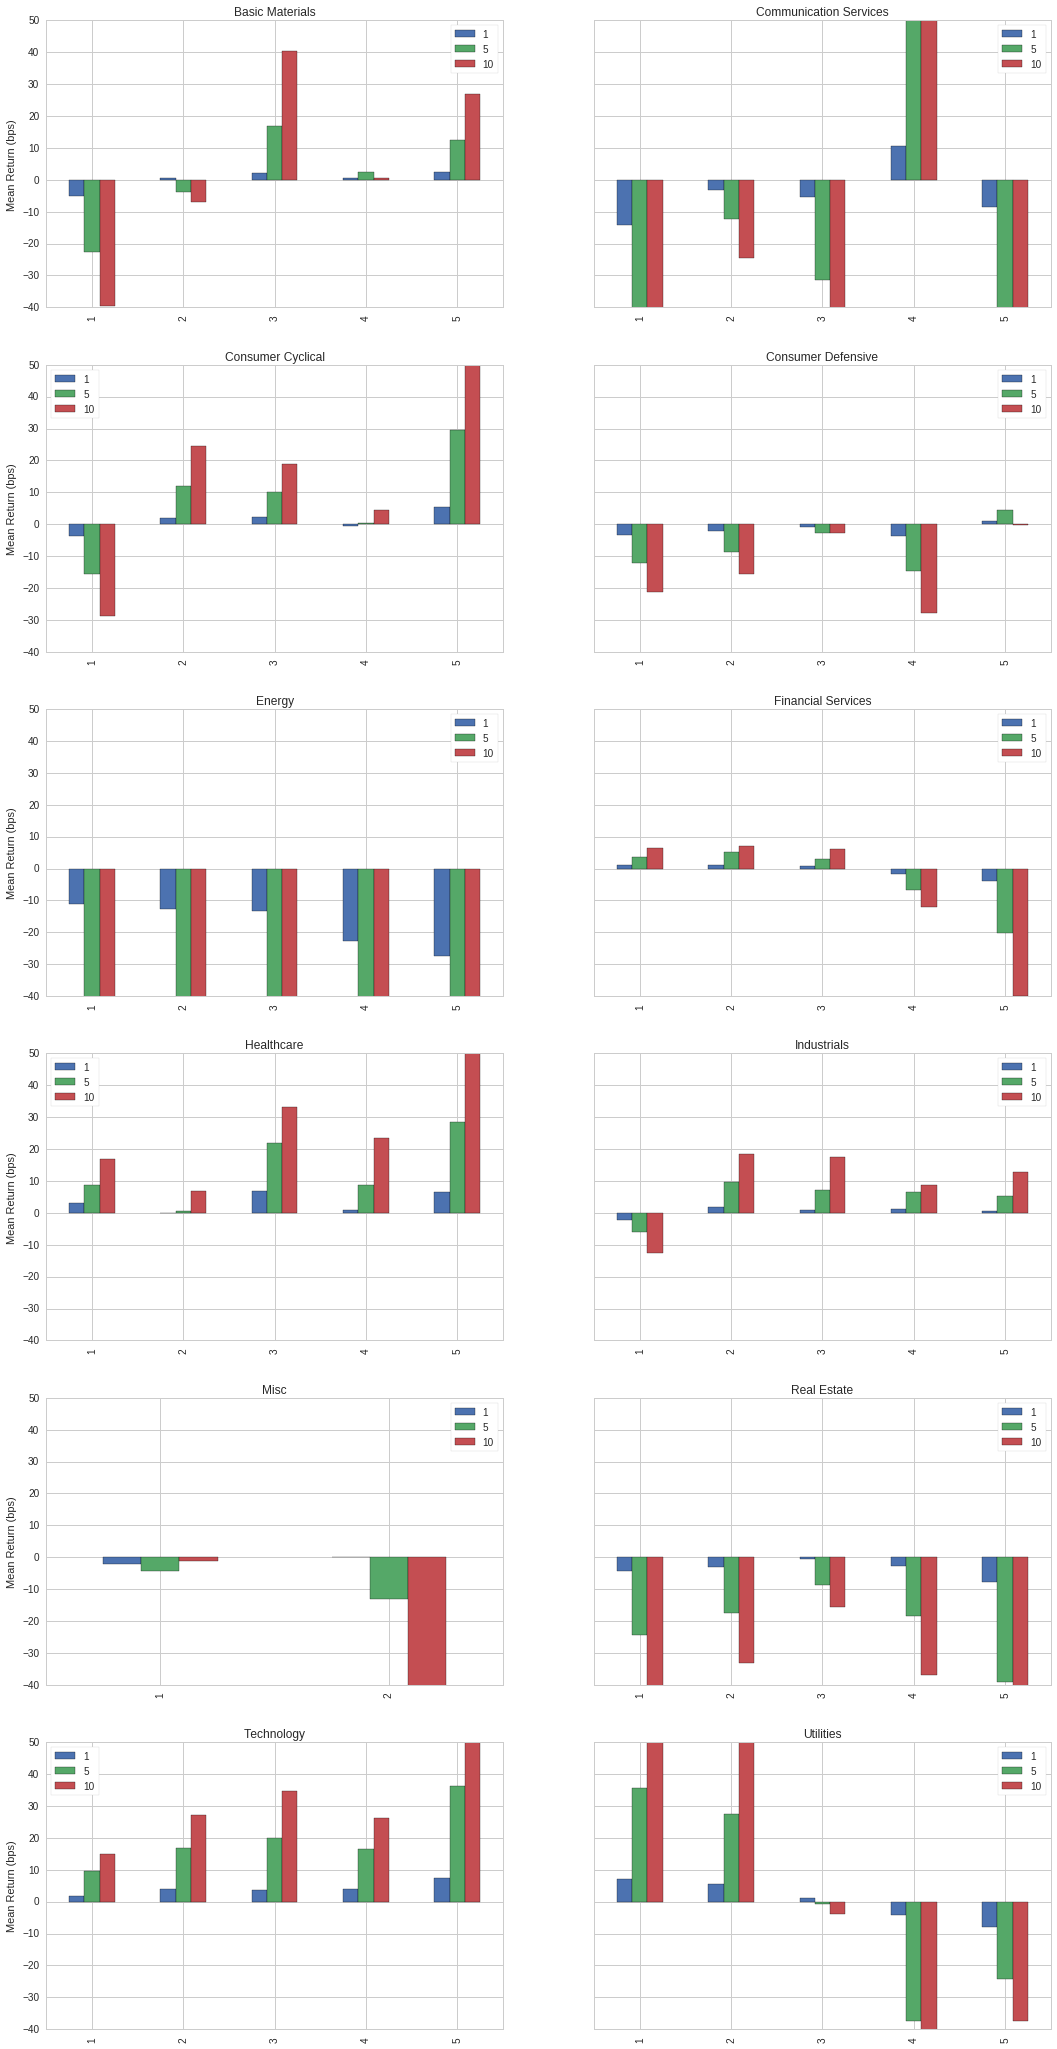

In [29]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True)

create summary sheet

Quantiles Statistics


min       max      mean       std   count    count %
factor_quantile                                                           
1               -1.036694 -0.073773 -0.175391  0.091483  101221  20.018472
2               -0.101030 -0.005424 -0.048647  0.020273  101085  19.991575
3               -0.030781  0.048614  0.011157  0.017929  101071  19.988806
4                0.027676  0.136805  0.075913  0.024258  101085  19.991575
5                0.103494  4.747144  0.264621  0.232819  101176  20.009572

Returns Analysis


1       5       10
Ann. alpha                                     0.033   0.058   0.065
beta                                           0.158  -0.030  -0.139
Mean Period Wise Return Top Quantile (bps)     1.837   8.435  14.726
Mean Period Wise Return Bottom Quantile (bps) -2.669 -11.452 -20.010
Mean Period Wise Spread (bps)                  4.508   4.004   3.517

Information Analysis


1      5      10
IC Mean      0.009  0.013  0.011
IC Std.      0.145  0.133  0.124
t-stat(IC)   0.981  1.475  1.421
p-value(IC)  0.327  0.142  0.157
IC Skew     -0.341 -0.231 -0.104
IC Kurtosis  0.215  0.455 -0.133
Ann. IR      1.004  1.508  1.453

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.008  0.040  0.078
Quantile 2 Mean Turnover   0.018  0.087  0.169
Quantile 3 Mean Turnover   0.021  0.102  0.198
Quantile 4 Mean Turnover   0.018  0.086  0.168
Quantile 5 Mean Turnover   0.008  0.039  0.076

1      5    10
Mean Factor Rank Autocorrelation  1.0  0.997  0.99

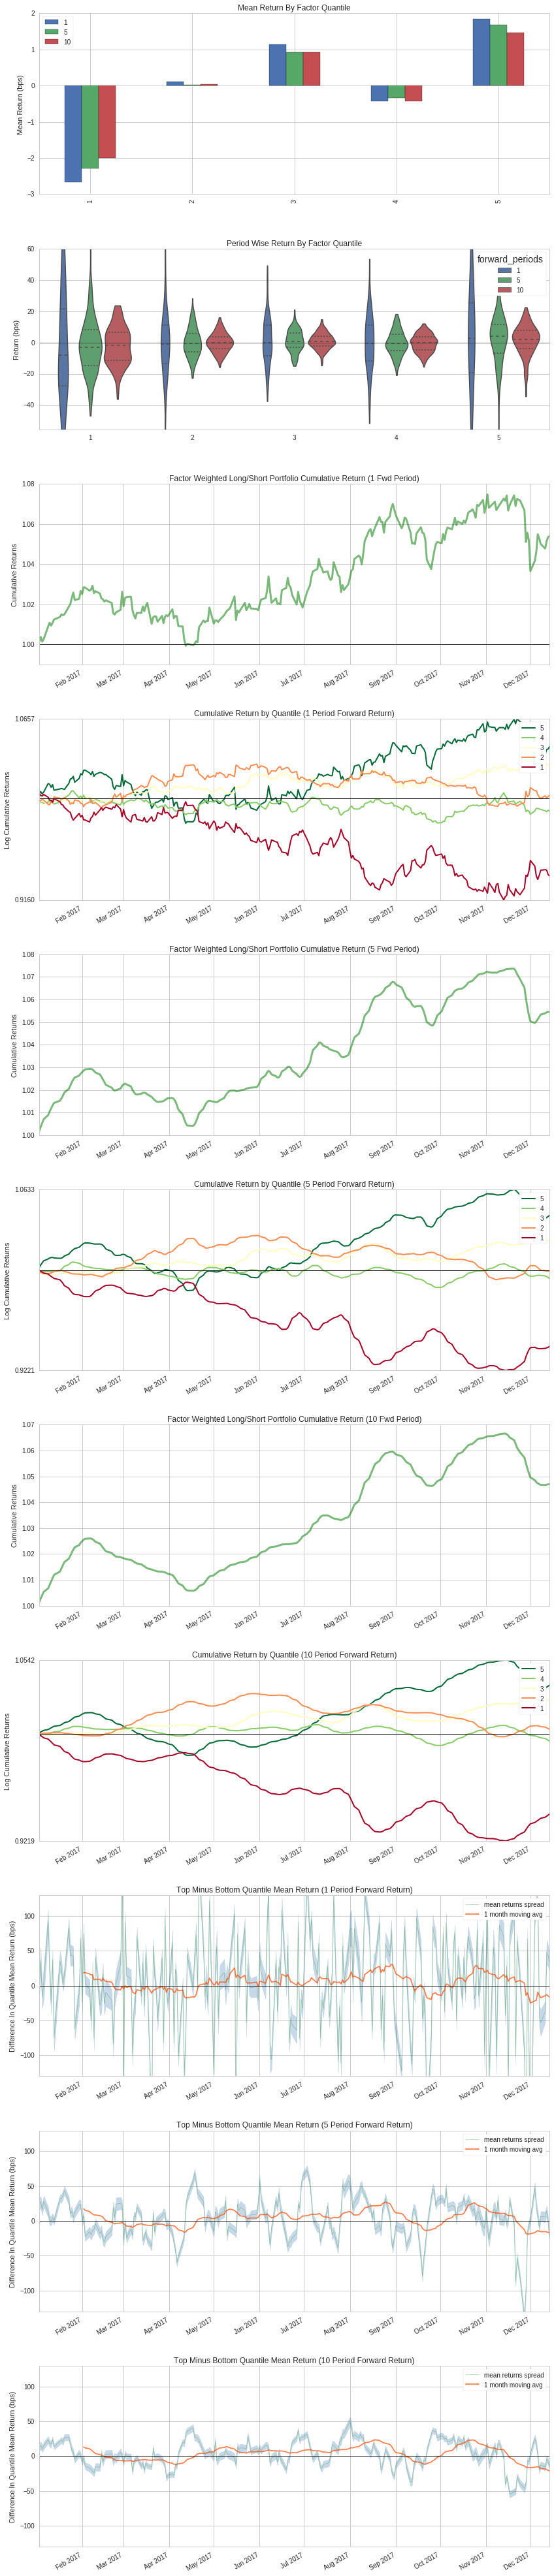

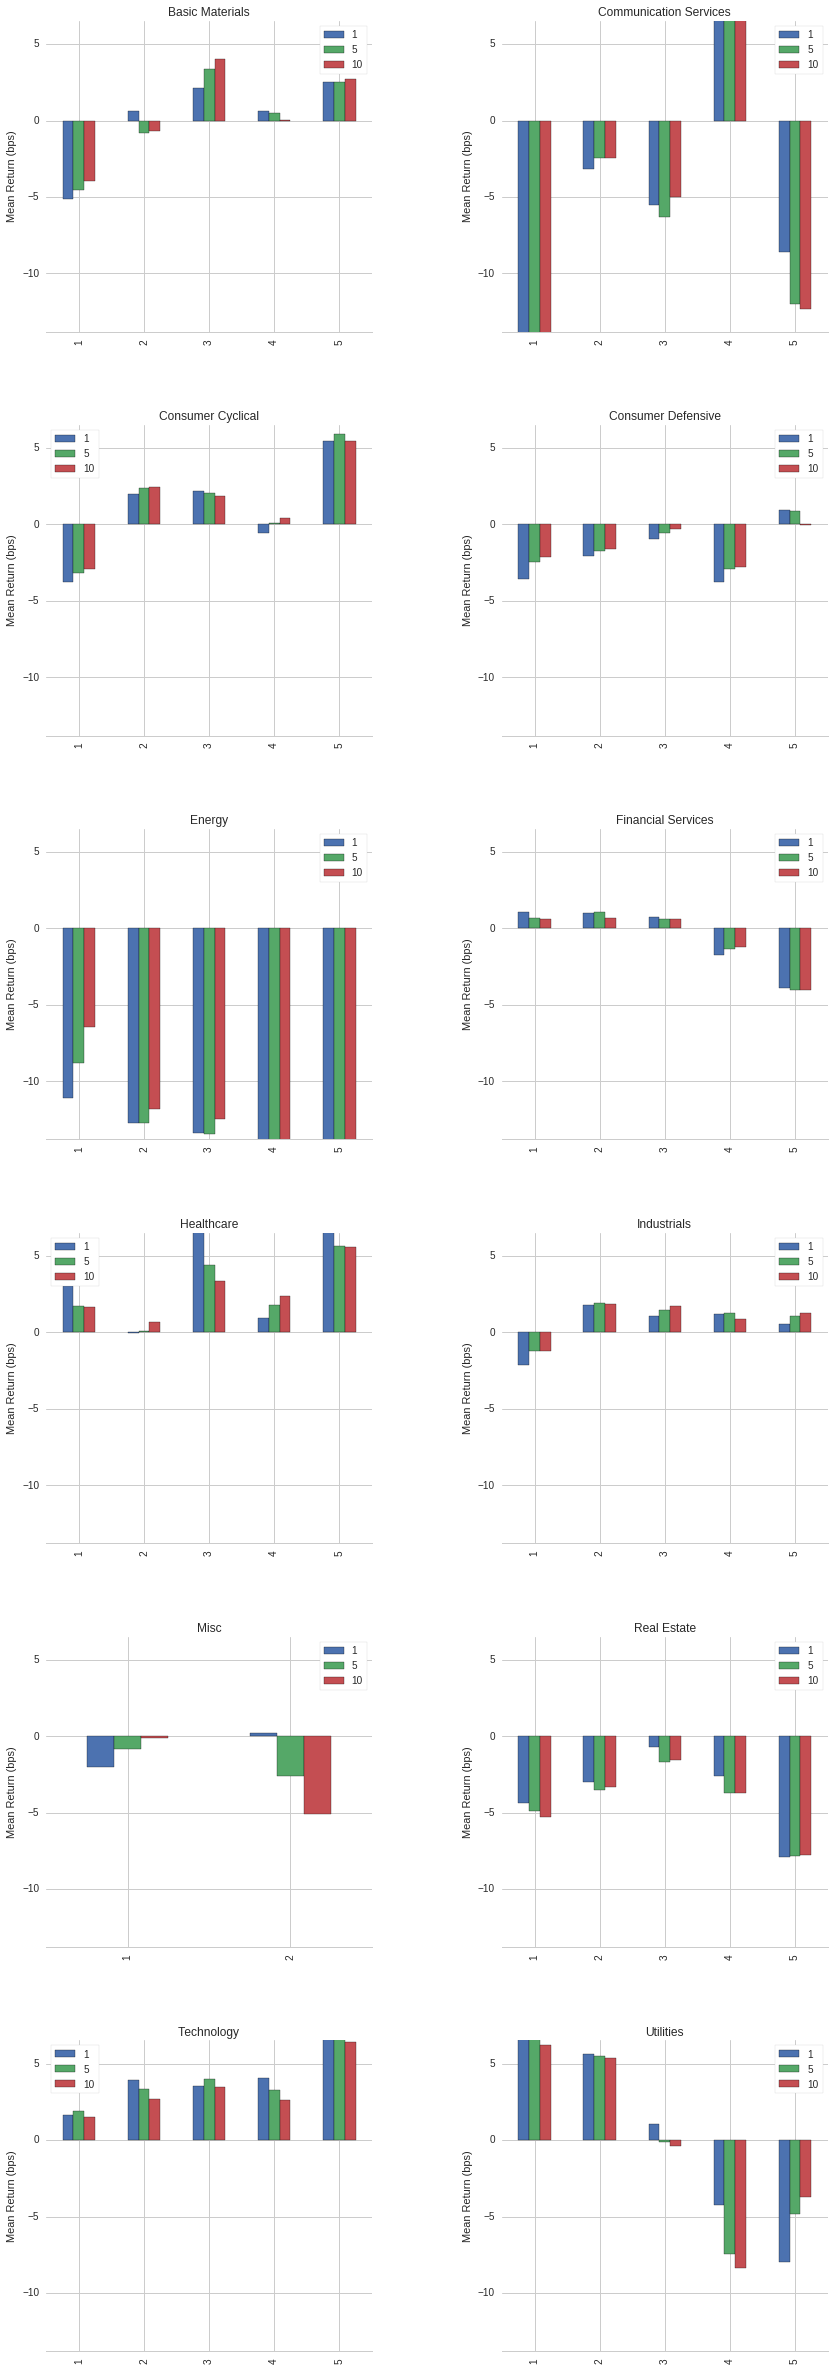

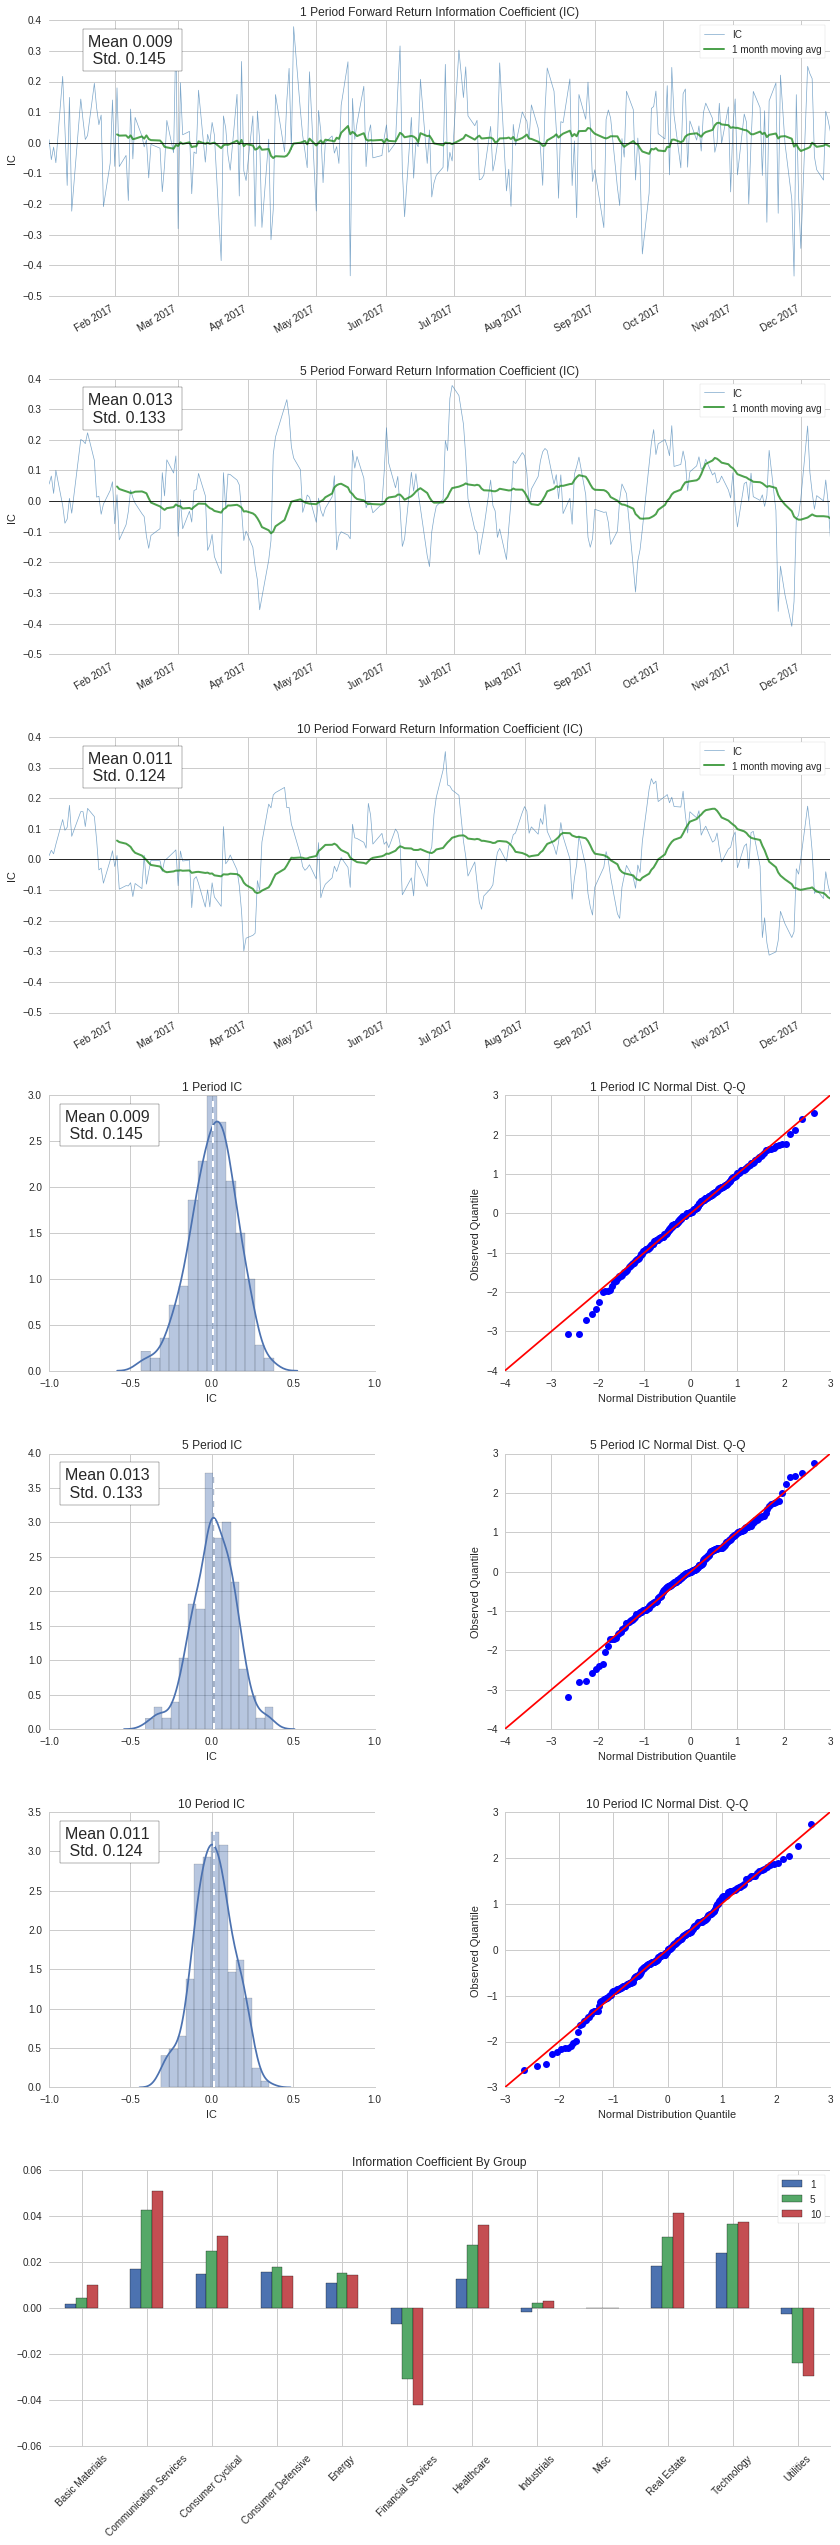

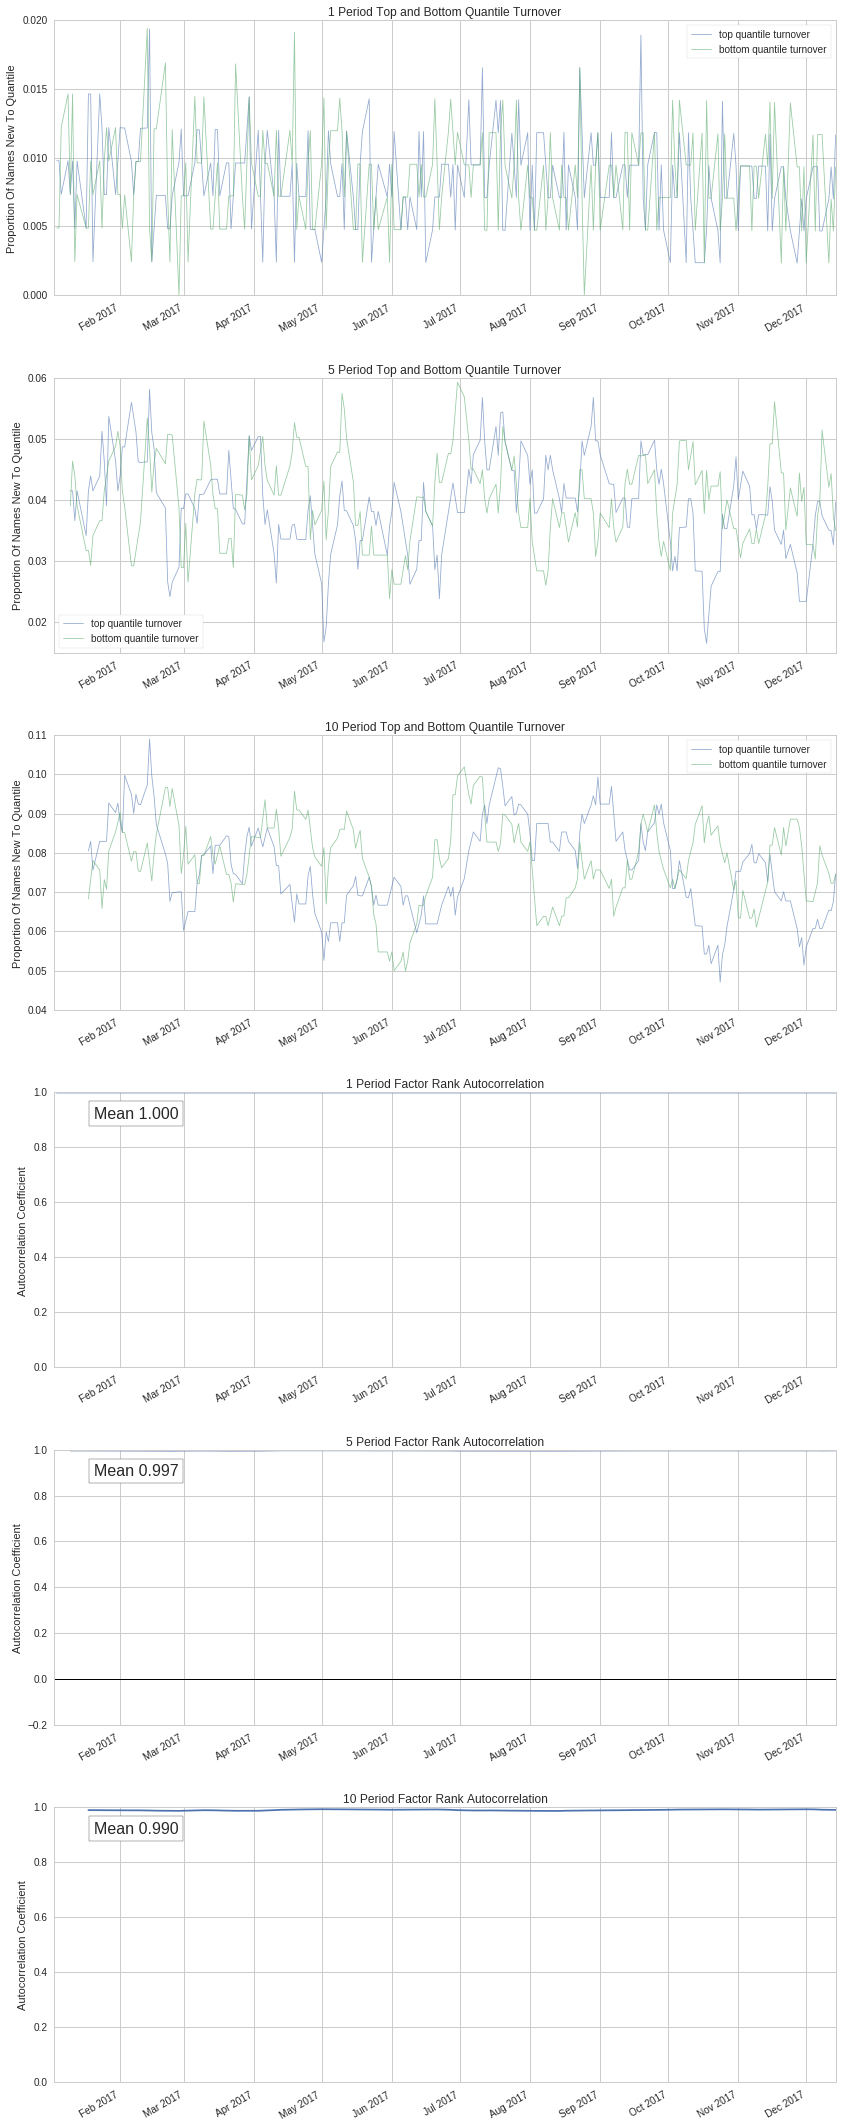

In [31]:
alphalens.tears.create_full_tear_sheet(factor_data, by_group=True)